# **Mutiple Linear Regression Case Study - II**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
data = pd.read_csv('/content/insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [10]:
data.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [11]:
data.duplicated().sum()

1

In [12]:
data.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [14]:
cat_columns = ['sex',	'smoker',	'region'	]

data = pd.get_dummies(data = data, columns = cat_columns, drop_first = True)
data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

numerical_columns = ['age', 'bmi', 'children']
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

In [17]:
data

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,16884.92400,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,1725.55230,True,False,False,True,False
2,-0.797954,0.383307,1.580926,4449.46200,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,21984.47061,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,10600.54830,True,False,True,False,False
1334,-1.509965,0.206139,-0.908614,2205.98080,False,False,False,False,False
1335,-1.509965,1.014878,-0.908614,1629.83350,False,False,False,True,False
1336,-1.296362,-0.797813,-0.908614,2007.94500,False,False,False,False,True


In [18]:
X = data.drop('charges', axis = 1)
y = data['charges']

In [19]:
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,-0.908614,False,True,False,False,True
1,-1.509965,0.509621,-0.078767,True,False,False,True,False
2,-0.797954,0.383307,1.580926,True,False,False,True,False
3,-0.441948,-1.305531,-0.908614,True,False,True,False,False
4,-0.513149,-0.292556,-0.908614,True,False,True,False,False
...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,1.580926,True,False,True,False,False
1334,-1.509965,0.206139,-0.908614,False,False,False,False,False
1335,-1.509965,1.014878,-0.908614,False,False,False,True,False
1336,-1.296362,-0.797813,-0.908614,False,False,False,False,True


In [20]:
y

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
560,0.483668,-1.757474,0.751079,False,False,True,False,False
1285,0.554869,-1.040599,-0.908614,False,False,False,False,False
1142,0.910875,-0.952015,-0.908614,False,False,False,True,False
969,-0.014740,0.599846,3.240619,False,False,False,True,False
486,1.053277,-1.508126,1.580926,False,False,True,False,False
...,...,...,...,...,...,...,...,...
1095,-1.509965,0.112633,2.410772,False,False,False,False,False
1130,-0.014740,-1.114419,3.240619,False,False,False,True,False
1294,1.338082,-0.900341,-0.908614,True,False,False,False,False
860,-0.157143,2.778356,0.751079,False,True,False,False,True


In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [27]:
y_pred = model.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('R2:', r2_score(y_test, y_pred))

MAE: 4181.194473753652
MSE: 33596915.851361476
RMSE: 5796.284659276274
R2: 0.7835929767120722


### **Evaluation**
* R² Score of 0.7836 is decent, but there is room for improvement, as roughly 21.64% of the variability remains unexplained.
* Our MAE and RMSE are in a reasonable range but suggest that the model could still be improved, especially for outliers or extreme values.

In [29]:
model.coef_

array([ 3.60914902e+03,  2.05488506e+03,  5.12478869e+02, -1.85916916e+01,
        2.36511289e+04, -3.70677326e+02, -6.57864297e+02, -8.09799354e+02])

In [32]:
coefficient = pd.DataFrame({
    'Features' : X.columns,
    'Coefficient' : model.coef_
}).sort_values('Coefficient', ascending = False)

print(coefficient)

           Features   Coefficient
4        smoker_yes  23651.128856
0               age   3609.149018
1               bmi   2054.885063
2          children    512.478869
3          sex_male    -18.591692
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354


### **Insights from Coefficients**
**Strongest Influencers:**
* Smoking status and age are the most critical factors driving medical charges.

**Negligible Impact:**
* Gender and region have a much smaller impact on charges compared to other factors.

**Interpretation Context:**
* These results suggest focusing on lifestyle factors like smoking and BMI for policies or programs aimed at reducing medical costs.

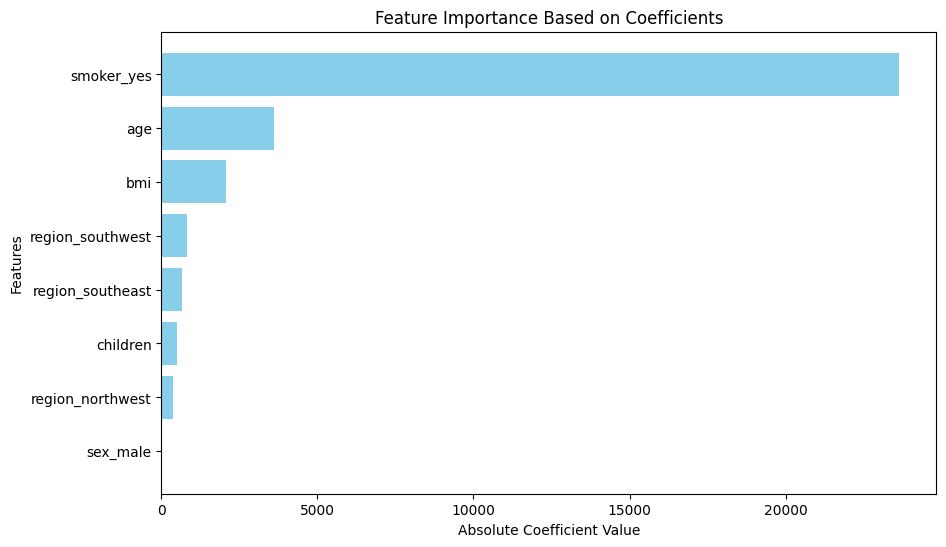

In [33]:
features = ['age', 'bmi', 'children', 'sex_male', 'smoker_yes',
            'region_northwest', 'region_southeast', 'region_southwest']

coefficients = [3609.15, 2054.89, 512.48, -18.59, 23651.13,
                -370.68, -657.86, -809.80]

coef_data = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})
coef_data['Abs_Coefficient'] = coef_data['Coefficient'].abs()

coef_data = coef_data.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(coef_data['Feature'], coef_data['Abs_Coefficient'], color='skyblue')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance Based on Coefficients')
plt.gca().invert_yaxis()
plt.show()
